# MNIST multi-layer perceptron

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

#### the dataset contains 55000 images each on represented as an array of 784 digits in [0,1.0)

In [8]:
mnist.train.images.shape

(55000, 784)

In [9]:
mnist.train.images[11].shape

(784,)

#### reshape the image into a matrix in order to be visualised 

In [10]:
sample = mnist.train.images[11232].reshape(28,28)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

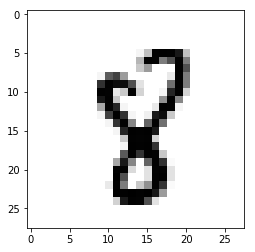

In [12]:
plt.imshow(sample, cmap='Greys')

In [13]:
learning_rate = 0.001
training_ephocs = 15
batch_size = 100

In [14]:
# numbero of possible classes in which classify the output
n_classes = 10

In [15]:
n_samples = mnist.train.num_examples
print(n_samples)

55000


In [16]:
n_input = 784

In [17]:
# number of neurons in each of the two hidden layers (we decided to use two hidden layers).
n_hidden_1 = 256
n_hidden_2 = 256

In [18]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for the input Data
    weghts: Dictionary of weights
    biases: Dictionary of biases
    '''
    
    # First hidden layer with RELU Activation
    # X*W + B 
    layer_1 = tf.add(tf.matmul(x,weights['w1']), biases['b1'])
    # RELU(X*W + B) -> f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer with RELU Activation 
    layer_2 = tf.add(tf.matmul(layer_1,weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Output layer
    out_layer = tf.add(tf.matmul(layer_2,weights['out']), biases['out'])
    
    return out_layer

In [19]:
weigts = {
    'w1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'w2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [20]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [21]:
x = tf.placeholder('float',[None, n_input])

In [22]:
y = tf.placeholder('float', [None, n_classes])

In [23]:
pred = multilayer_perceptron(x, weigts, biases)

## Define cost function and optimizier

In [24]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

ValueError: Only call `softmax_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)

## Training the model

In [25]:
# produce one example of inpu and class output
t = mnist.train.next_batch(1)

In [26]:
Xsamp, ysamp = t

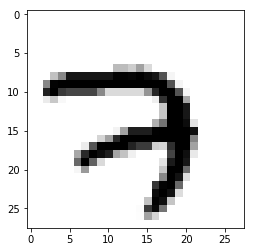

In [27]:
plt.imshow(Xsamp.reshape(28,28), cmap='Greys')

In [28]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

## Run the session

In [29]:
ss = tf.InteractiveSession()

In [30]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [31]:
ss.run(init)

In [35]:
for epoch in range(training_ephocs):
    
    avg_cost = 0.0
    tot_batch = int(n_samples/batch_size)
    
    for i in range(tot_batch):
    
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = ss.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c/tot_batch
    
    print('Epoch: {} cost{:.4f}'.format(epoch+1, avg_cost))
    
print('Model has completed {} epochs of trainig'.format(training_ephocs))

NameError: name 'optimizer' is not defined

## Model evaluations

In [33]:
c_preditcion = tf.equal(tf.arg_max(pred, 1), tf.arg_max(y, 1))

In [36]:
print(c_preditcion[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [37]:
c_preditcion = tf.cast(c_preditcion, 'float')

In [39]:
print(c_preditcion[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [40]:
accuracy = tf.reduce_mean(c_preditcion)

In [41]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [42]:
mnist.test.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [44]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.081200004